In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definir la matriz de mensaje
matrix_message = np.array([[47, 49, -19, 257, 487], [10, -9, 63, 137, 236], [79, 142, -184, 372, 536], [59, 70, -40, 332, 588]])

# Definir la matriz de código
matrix_codigo = np.array([[1, 2, -3, 4, 5], [-2, -5, 8, -8, -9], [1, 2, -2, 7, 9], [1, 1, 0, 6, 12], [2, 4, -6, 8, 11]])

# Calcular la matriz inversa de la matriz de código
inverso_A = np.linalg.inv(matrix_codigo)

# Multiplicar la matriz de mensaje por la matriz inversa de la matriz de código
cd = np.matmul(matrix_message, inverso_A)

# Inicializar una cadena para almacenar el mensaje decodificado
message = ""

# Definir el alfabeto y el espacio
alf = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "

# Recorrer los elementos de la matriz resultante
for i in range(np.shape(cd)[0]):
  for j in range(np.shape(cd)[1]):
    # Redondear el valor en la matriz y usarlo como índice en el alfabeto
    message += alf[round(cd[i, j]) - 1]

# El mensaje decodificado se encuentra en la variable 'message'
message

'ARE YOU HAVING FUN  '

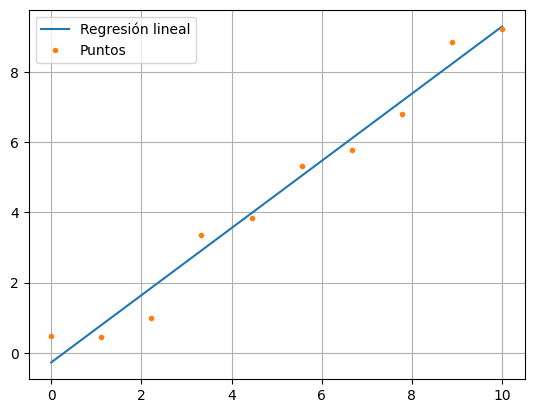

In [4]:
# Definir el número de puntos y generar valores de x1
N = 10
x1 = np.linspace(0, 10, N)

# Generar valores de ruido aleatorio
noise = 2 * np.random.random(N) - 1

# Calcular y con ruido
y = 0.9 * x1 + noise

# Crear un array de unos
one = np.ones(len(x1))

# Construir la matriz X y su transpuesta X_
X_ = np.array([one, x1])
X = np.transpose(X_)

# Calcular los parámetros de la regresión lineal (b y m)
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_, X)), X_), y)
b, m = theta

# Definir la función de regresión lineal
f = lambda x: m * x + b

# Crear un nuevo array x para la línea de regresión
x = np.linspace(x1[0], x1[-1], 100)

# Graficar la regresión lineal y los puntos originales
plt.plot(x, f(x), label="Regresión lineal")
plt.plot(x1, y, ".", label="Puntos")
plt.grid(True)
plt.legend()
plt.show()

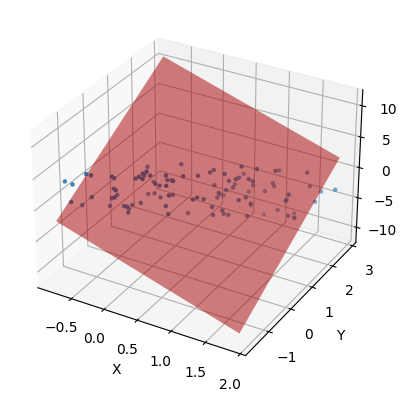

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Número de puntos
N = 100

# Generar datos con ruido
x = np.linspace(-1, 1, N) + np.random.random(N)
y = np.linspace(-2, 2, N) + np.random.random(N)
noise1 = 2 * np.random.random(N) - 1
noise2 = 2 * np.random.random(N) - 1
z = 2 * (x + noise1) - 3 * (y + noise2) + 0.0

# Crear un array de unos
one = np.ones(len(x))

# Construir la matriz Z y su transpuesta Z_
Z_ = np.array([one, x, y])
Z = np.transpose(Z_)

# Calcular los parámetros de la regresión lineal (a, b, c)
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z_, Z)), Z_), z)
c, b, a = theta

# Crear malla para la superficie de regresión
x_range = np.linspace(min(x), max(x), 100)
y_range = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = a * X + b * Y + c

# Visualizar los datos y la superficie de regresión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='.', label='Datos originales')
surface = ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='r', label='Superficie de regresión')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Añadir leyenda
#ax.legend() no me funciona

# Mostrar la gráfica
plt.show()